# Capstone Jupyter Notebook 2 - Modeling Spotify Streams

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Download dataset of unique songs with known number of Spotify streams

In [4]:
songs = pd.read_csv('./Spotify_Unique.csv', index_col='ID')
songs.head()

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,...,Stream,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video
ID,,,,,,,,,,,,,,,,,,,,,
0,Feel Good Inc.,0d28khcov6AiegSCpG5TuT,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6,-6.679,0.1770,...,1040234854,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True
1,Rhinestone Eyes,1foMv2HQwfQ2vntFf9HFeG,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8,-5.815,0.0302,...,310083733,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True
2,New Gold (feat. Tame Impala and Bootie Brown),64dLd6rVqDLtkXFYrEUHIU,New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1,-3.930,0.0522,...,63063467,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True
3,On Melancholy Hill,0q6LuUqGLUiCPP1cbdwFs3,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2,-5.810,0.0260,...,434663559,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True
4,Clint Eastwood,7yMiX7n9SBvadzox8T5jzT,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10,-8.627,0.1710,...,617259738,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True


In [188]:
songs.Stream.median()

48633246.0

### Remove columns with YouTube info. They are not relevant here.

In [5]:
songs.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Stream', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video'],
      dtype='object')

In [6]:
drop_columns = list(songs.columns[-9:])
print(drop_columns)

['Url_youtube', 'Title', 'Channel', 'Views', 'Likes', 'Comments', 'Description', 'Licensed', 'official_video']


In [8]:
songs.drop(drop_columns, axis=1, inplace=True)
songs.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
       'Stream'],
      dtype='object')

### Investigate values in columns

In [9]:
songs.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
count,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,18318.000000,1.831800e+04,1.831800e+04
mean,0.618363,0.634223,5.292608,-7.677330,0.094061,0.290516,0.055809,0.192395,0.529710,120.792920,2.219498e+05,1.317489e+08
std,0.164769,0.215412,3.575679,4.608506,0.107429,0.288356,0.192386,0.166621,0.246544,29.648942,9.087300e+04,2.368187e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,6.574000e+03
25%,0.515000,0.503000,2.000000,-8.893750,0.035300,0.042325,0.000000,0.094100,0.338000,97.000500,1.803178e+05,1.703825e+07
50%,0.635000,0.666000,5.000000,-6.553000,0.049800,0.188500,0.000003,0.125000,0.536000,119.976000,2.131030e+05,4.863325e+07
75%,0.739000,0.800000,8.000000,-4.947000,0.101000,0.480000,0.000494,0.237000,0.728000,139.986000,2.515435e+05,1.346425e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,3.386520e+09


### Attempt to find correlations between variables

In [10]:
songs.corr()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_1640\2131039685.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
Danceability,1.000000,0.228247,0.033318,0.340298,0.224196,-0.271930,-0.307094,-0.080379,0.464421,-0.072636,-0.114597,0.063947
Energy,0.228247,1.000000,0.029087,0.742861,0.083276,-0.661391,-0.299599,0.173759,0.385363,0.160608,0.020689,0.039713
Key,0.033318,0.029087,1.000000,0.023367,0.017277,-0.027774,0.003645,-0.009781,0.037120,-0.003748,-0.006225,-0.006732
Loudness,0.340298,0.742861,0.023367,1.000000,0.054623,-0.546396,-0.536987,0.092311,0.304566,0.146529,0.007002,0.113384
Speechiness,0.224196,0.083276,0.017277,0.054623,1.000000,-0.090755,-0.106541,0.075688,0.057589,0.041446,-0.073760,-0.018855
Acousticness,-0.271930,-0.661391,-0.027774,-0.546396,-0.090755,1.000000,0.266015,-0.040552,-0.201295,-0.127206,-0.034172,-0.098110
Instrumentalness,-0.307094,-0.299599,0.003645,-0.536987,-0.106541,0.266015,1.000000,-0.061775,-0.261977,-0.077088,-0.004074,-0.090306
Liveness,-0.080379,0.173759,-0.009781,0.092311,0.075688,-0.040552,-0.061775,1.000000,0.037785,0.013681,0.002781,-0.040893
Valence,0.464421,0.385363,0.037120,0.304566,0.057589,-0.201295,-0.261977,0.037785,1.000000,0.091729,-0.068167,-0.016538
Tempo,-0.072636,0.160608,-0.003748,0.146529,0.041446,-0.127206,-0.077088,0.013681,0.091729,1.000000,-0.012377,0.004889


In [16]:
songs.corr().Stream.sort_values()

C:\Users\Andrew Vieira\AppData\Local\Temp\ipykernel_1640\1363287330.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  songs.corr().Stream.sort_values()


Acousticness       -0.098110
Instrumentalness   -0.090306
Liveness           -0.040893
Speechiness        -0.018855
Valence            -0.016538
Key                -0.006732
Duration_ms         0.001686
Tempo               0.004889
Energy              0.039713
Danceability        0.063947
Loudness            0.113384
Stream              1.000000
Name: Stream, dtype: float64

### Unfortunately, no variable is strongly correlated to the number of streams.

### Create a list of all the metric (input variable) columns

In [17]:
feature_columns = list(songs.describe().columns)
feature_columns.remove('Stream')
print(feature_columns)

['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']


### This function takes a DataFrame, a list of input columns, and a regression type as inputs, creates a model to predict the number of streams a song has, and returns the RMSE of the model.

In [19]:
def get_rmse(df, cols, reg):
    X = df[cols]
    y = df.Stream
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    reg.fit(X_train, y_train)
    
    preds = reg.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, preds))

In [18]:
# Three regression types in the scikit-learn library
lin_reg = LinearRegression()
rand_for_reg = RandomForestRegressor()
kn_reg = KNeighborsRegressor()

### Use the average number of streams in the test data as a baseline

In [22]:
X = songs[feature_columns]
y = songs.Stream

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

y_test_mean = y_test.mean()
print('Average number of streams in test data =', round(y_test_mean))

Average number of streams in test data = 131186291


### For a model to be good, its RMSE must be less than the baseline RMSE.

In [35]:
baseline_series = [y_test_mean] * len(y_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_series))
best_rmse = baseline_rmse
print('Baseline RMSE =', round(best_rmse))

Baseline RMSE = 232646553


In [34]:
# This function returns and prints the smaller RMSE.
# This will be used a lot!
def new_best_rmse(rmse_new, rmse_old):
    print('RMSE for this model =', round(rmse_new))
    if rmse_new < rmse_old:
        print('This is now the best RMSE.')
        return rmse_new
    print('The best RMSE is still', round(rmse_old))
    return rmse_old

### Now create a linear regression model with all input variables and calculate the RMSE

In [36]:
rmse = get_rmse(songs, feature_columns, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 228797444
This is now the best RMSE.


In [42]:
100 * (1 - best_rmse/baseline_rmse)

1.654487878042421

### The RMSE of the linear regression model is 1.65% better than the baseline.
### Let's try a random forest regression model with the same inputs.

In [43]:
rmse = get_rmse(songs, feature_columns, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 233940598
The best RMSE is still 228797444


### A random forest regression is not better than the linear regression.
### What about k-neighbors regression?

In [44]:
rmse = get_rmse(songs, feature_columns, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 256347339
The best RMSE is still 228797444


### With 50 neighbors?

In [57]:
kn_reg = KNeighborsRegressor(n_neighbors=50)
rmse = get_rmse(songs, feature_columns, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 234268825
The best RMSE is still 228797444


### The linear regression model is still the best so far.

### Now apply feature engineering to the `Key` column by changing it from numerical to categorical

In [45]:
songs.Key.value_counts()

0     2041
7     1979
1     1944
2     1819
9     1754
5     1536
11    1472
4     1332
8     1309
6     1278
10    1261
3      593
Name: Key, dtype: int64

In [46]:
key_dummies = pd.get_dummies(songs.Key, prefix='Key', drop_first=True)
songs2 = pd.concat([songs, key_dummies], axis=1)
songs2.drop('Key', axis=1, inplace=True)
songs2.columns

Index(['Track', 'Track_id', 'Album', 'Album_type', 'Uri', 'Danceability',
       'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream', 'Key_1',
       'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9',
       'Key_10', 'Key_11'],
      dtype='object')

### The new dataframe contains dummy columns for each value of `Key` except 0, because it was the most common value.
### Create a list of feature columns with the new dummy variables

In [47]:
feature_columns_2 = list(songs2.describe().columns)
feature_columns_2.remove('Stream')
print(feature_columns_2)

['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11']


In [48]:
rmse = get_rmse(songs2, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 228946272
The best RMSE is still 228797444


### This RMSE is actually higher than the best RSME (but not by much).
### Would random forest regression be better?

In [50]:
rmse = get_rmse(songs2, feature_columns_2, rand_for_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 234493421
The best RMSE is still 228797444


### K neighbors regression?

In [56]:
kn_reg = KNeighborsRegressor(n_neighbors=50)
rmse = get_rmse(songs2, feature_columns_2, kn_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 234267444
The best RMSE is still 228797444


### Now try removing outliers

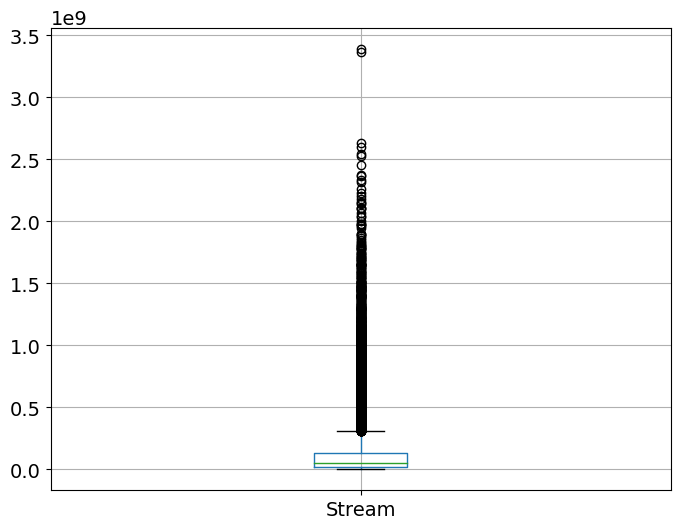

In [58]:
songs2.boxplot(column='Stream');

In [59]:
songs2[songs2.Stream > 3.0e9]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
12452,Shape of You,7qiZfU4dY1lWllzX7mPBI3,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,-3.183,0.0802,0.58100,...,0,0,0,0,0,0,0,0,0,0
15250,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,After Hours,album,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,-5.934,0.0598,0.00146,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Remove the two songs with ridiculously high streams
songs3 = songs2[songs2.Stream <= 3.0e9]

In [61]:
rmse = get_rmse(songs3, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 224733049
This is now the best RMSE.


### The model is better without those outliers. Will removing more outliers improve it?

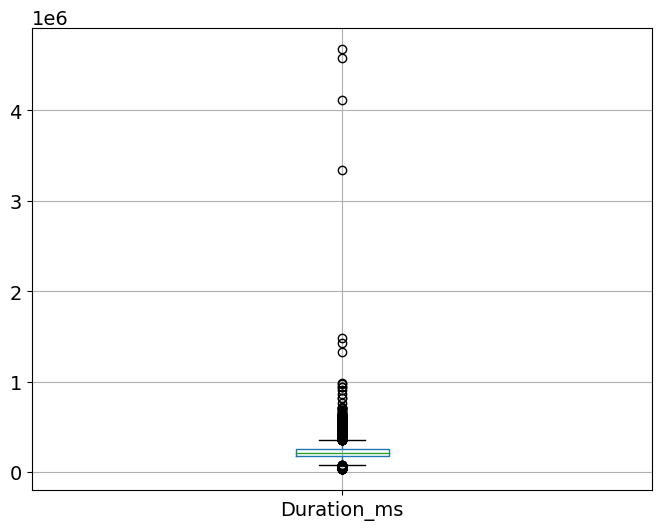

In [62]:
songs3.boxplot(column='Duration_ms');

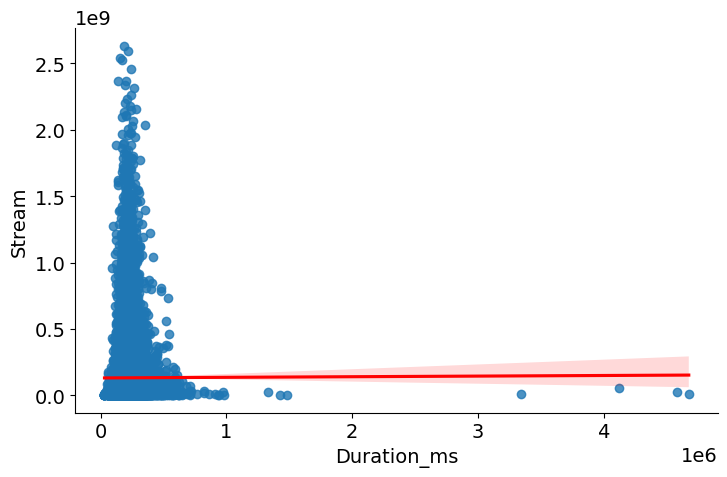

In [63]:
sns.lmplot(data=songs3, x='Duration_ms', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [64]:
songs3[songs3.Duration_ms > 1e6]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
2943,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,1FSYDJAlyHAabWhiGgYfDq,52 Non Stop Dilbar Dilbar Remix,compilation,spotify:track:1FSYDJAlyHAabWhiGgYfDq,0.5210,0.837,-4.501,0.0794,0.0593,...,0,0,0,0,0,1,0,0,0,0
4449,Om Bhurbhuwasah,3oj9ZcytkTaovswquxjzo1,Gayatri Mantra,single,spotify:track:3oj9ZcytkTaovswquxjzo1,0.7190,0.466,-9.153,0.0417,0.7330,...,0,1,0,0,0,0,0,0,0,0
5246,Hitazos: Amores Como el Nuestro / Que Fue / Al...,2ZixSR7OKIpdPUk4dwOekn,Hitazos: Amores Como el Nuestro / Que Fue / Al...,compilation,spotify:track:2ZixSR7OKIpdPUk4dwOekn,0.5190,0.790,-4.342,0.0503,0.2300,...,0,0,0,0,0,1,0,0,0,0
5385,Ragga Moofin Mix,6ZbWeRhL76RXghqoMNF932,"Playero 37 ""Underground""",album,spotify:track:6ZbWeRhL76RXghqoMNF932,0.7970,0.670,-14.259,0.1770,0.0354,...,0,0,0,0,1,0,0,0,0,0
5387,Non Stop Reegae,5EVCuT4L4hsyDtA7H1yByW,"Playero 38 ""Underground""",album,spotify:track:5EVCuT4L4hsyDtA7H1yByW,0.8570,0.673,-11.922,0.0949,0.0258,...,0,0,0,0,0,0,0,0,0,0
9361,Ocean Waves for Sleep,1saXdvEAafdRzUphXBzSHg,Ocean Waves,single,spotify:track:1saXdvEAafdRzUphXBzSHg,0.0797,0.995,-17.379,0.0612,0.9320,...,0,0,0,0,0,0,0,0,0,0
10475,High Rated Gabru 52 Non Stop Hits(Remix By Man...,2HyMuSCZJIxgnZBkuPT3TA,High Rated Gabru 52 Non Stop Hits,compilation,spotify:track:2HyMuSCZJIxgnZBkuPT3TA,0.3850,0.935,-2.545,0.2590,0.0843,...,1,0,0,0,0,0,0,0,0,0


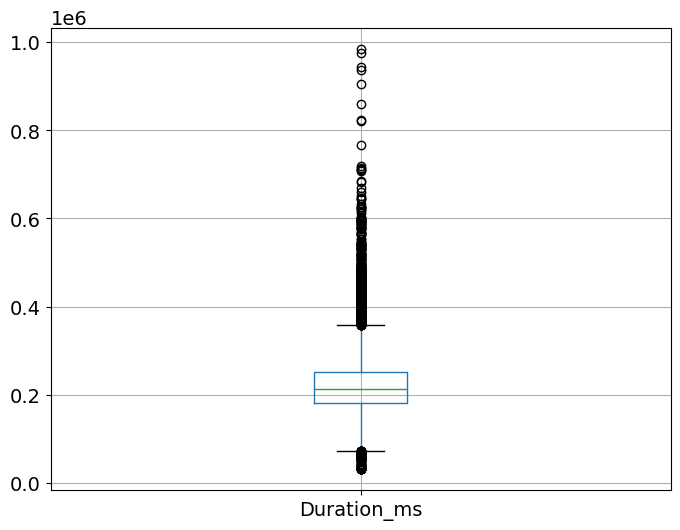

In [72]:
# Remove songs over 1,000,000 ms long
songs4 = songs3[songs3.Duration_ms <= 1e6]
songs4.boxplot(column='Duration_ms');

In [66]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 234567698
The best RMSE is still 224733049


### No improvement. Revert back to previous dataset (`songs3`).

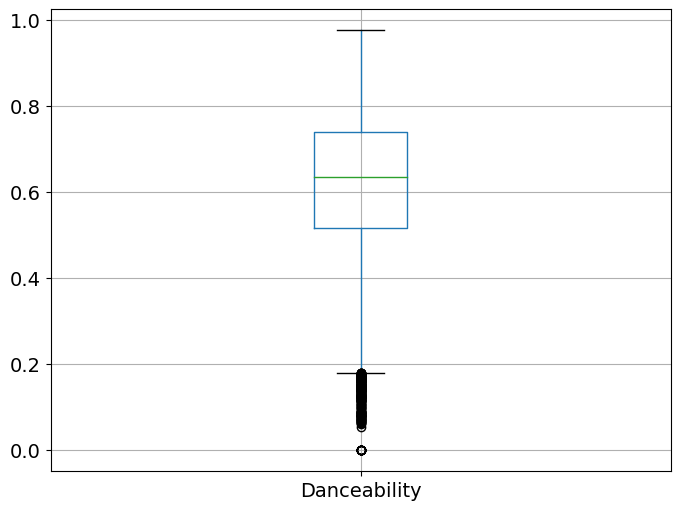

In [67]:
songs3.boxplot(column='Danceability');

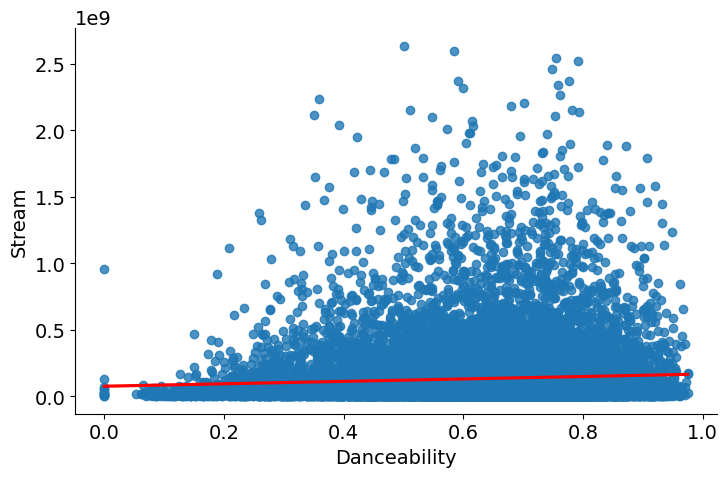

In [68]:
sns.lmplot(data=songs3, x='Danceability', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [69]:
songs3[songs3.Danceability == 0.0]

,Track,Track_id,Album,Album_type,Uri,Danceability,Energy,Loudness,Speechiness,Acousticness,...,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11
ID,,,,,,,,,,,,,,,,,,,,,
2073,"Hello, Dolly!",63kd4m3VFxcJjPVVtbVNAu,"Hello, Dolly! (Remastered)",album,spotify:track:63kd4m3VFxcJjPVVtbVNAu,0.0,0.405000,-9.935,0.0,0.84200,...,0,0,0,0,0,0,0,0,0,0
2871,Arrival,6quMGNh47CpSR5kmZSYSTK,Israeli Salad,album,spotify:track:6quMGNh47CpSR5kmZSYSTK,0.0,0.802000,-7.977,0.0,0.00417,...,0,0,0,0,0,0,0,0,0,0
7187,"Rigoletto / Act 3: ""La donna è mobile"" - Live",4mZlQk9Ha7WwJZUngARQeY,The Three Tenors - The Best of the 3 Tenors,compilation,spotify:track:4mZlQk9Ha7WwJZUngARQeY,0.0,0.402000,-15.718,0.0,0.97200,...,0,0,0,1,0,0,0,0,0,0
8373,Adieux,0aGA1zFV0ER1xLiJmHxb2s,You And The Night,album,spotify:track:0aGA1zFV0ER1xLiJmHxb2s,0.0,0.105000,-13.925,0.0,0.98900,...,0,0,0,0,0,1,0,0,0,0
9266,The Departure,59gg6zQhSKGVnkT3hWAY3l,Voyager - Essential Max Richter,album,spotify:track:59gg6zQhSKGVnkT3hWAY3l,0.0,0.036200,-22.519,0.0,0.99400,...,0,0,0,0,0,0,0,0,0,0
9348,Beach Waves and Soothing Brown Noise,0tIkLggEJ9QriD7KFz1GGA,Soothing Brown Noise Waves and Calming Ambient...,album,spotify:track:0tIkLggEJ9QriD7KFz1GGA,0.0,0.000252,-17.746,0.0,0.00948,...,0,0,0,0,0,0,0,1,0,0
13839,Clean White Noise - Loopable with no fade,2bRKxuH1o7pTmb1y4GfdEc,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:2bRKxuH1o7pTmb1y4GfdEc,0.0,0.003420,-28.460,0.0,0.79100,...,0,0,0,0,0,0,1,0,0,0
13840,Pure Brown Noise - Loopable with no fade,5I21rMWLtCjWQl6QyLn85W,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:5I21rMWLtCjWQl6QyLn85W,0.0,0.001250,-27.592,0.0,0.90800,...,0,0,0,0,0,0,0,0,0,0
13842,Air Conditioner - Loopable with no fade,4f9s3wr1e1QdpMDxQosSTz,Best White Noise for Baby Sleep - Loopable wit...,album,spotify:track:4f9s3wr1e1QdpMDxQosSTz,0.0,0.000055,-21.995,0.0,0.92100,...,0,0,0,0,0,0,0,0,1,0


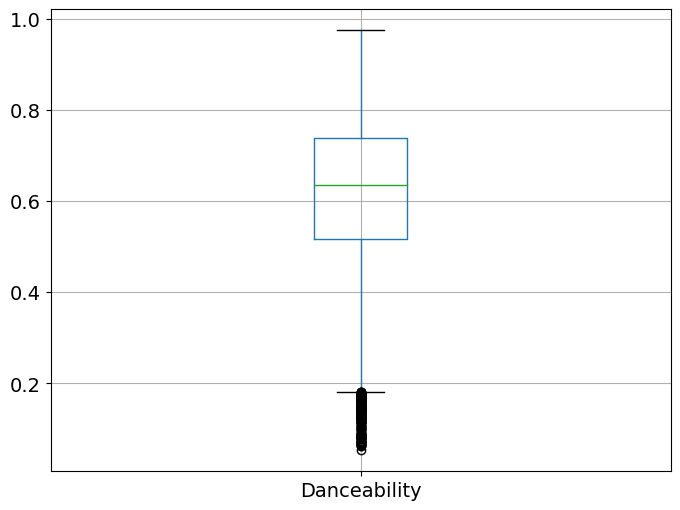

In [73]:
# Remove songs with danceability of 0.0
songs4 = songs3[songs3.Danceability > 0.0]
songs4.boxplot(column='Danceability');

In [74]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 232369633
The best RMSE is still 224733049


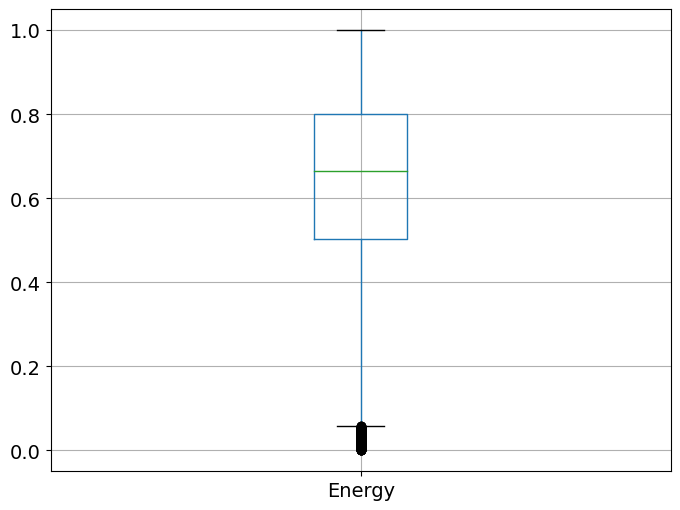

In [75]:
# No improvement. Still using songs3
songs3.boxplot(column='Energy');

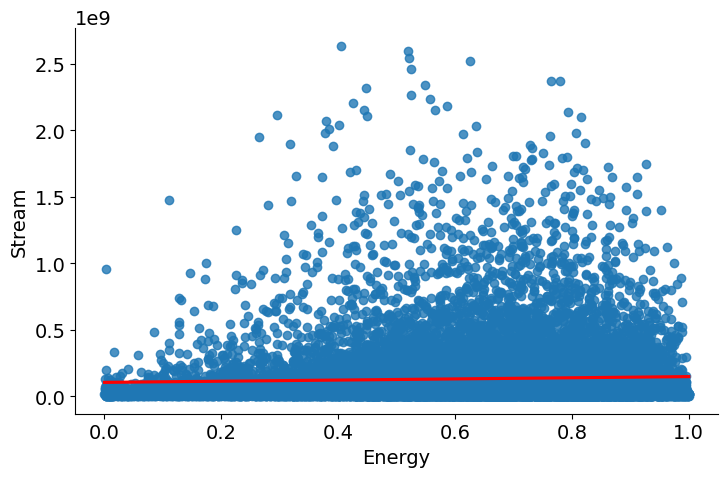

In [76]:
sns.lmplot(data=songs3, x='Energy', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

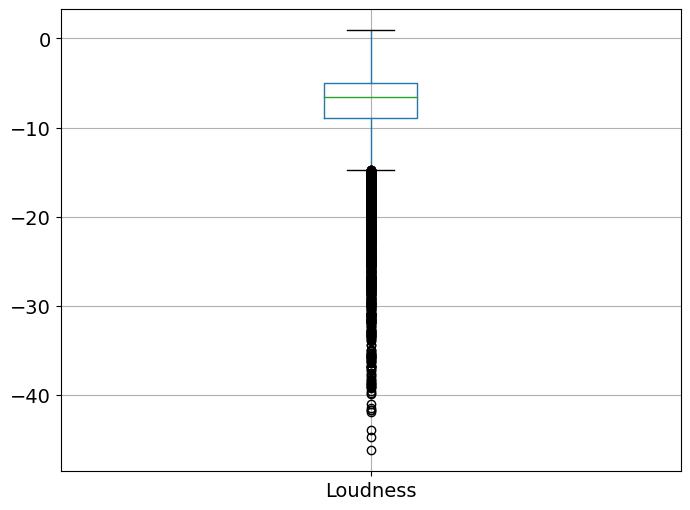

In [77]:
songs3.boxplot(column='Loudness');

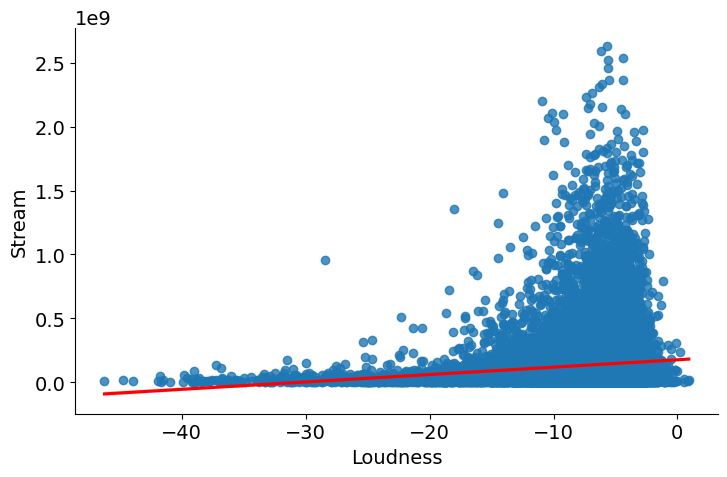

In [78]:
sns.lmplot(data=songs3, x='Loudness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

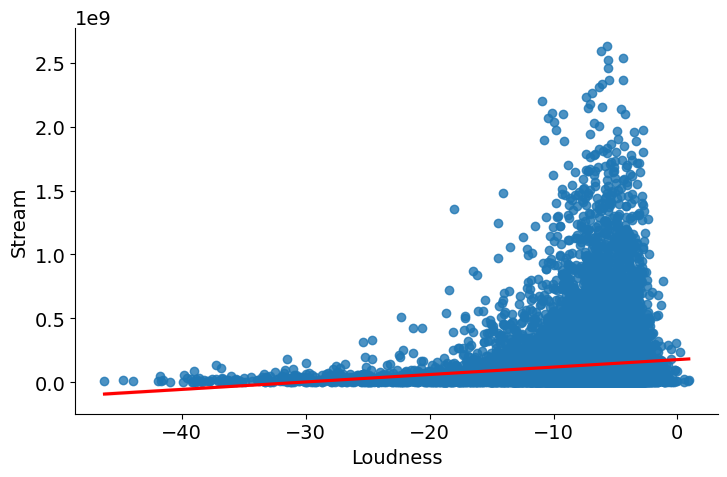

In [79]:
# What happens if I remove that outlier around -30 dB?
songs4 = songs3.drop(songs3[(songs3.Loudness > -30) & (songs3.Loudness < -25) & (songs3.Stream > 0.5e9)].index)
sns.lmplot(data=songs4, x='Loudness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [80]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 226286996
The best RMSE is still 224733049


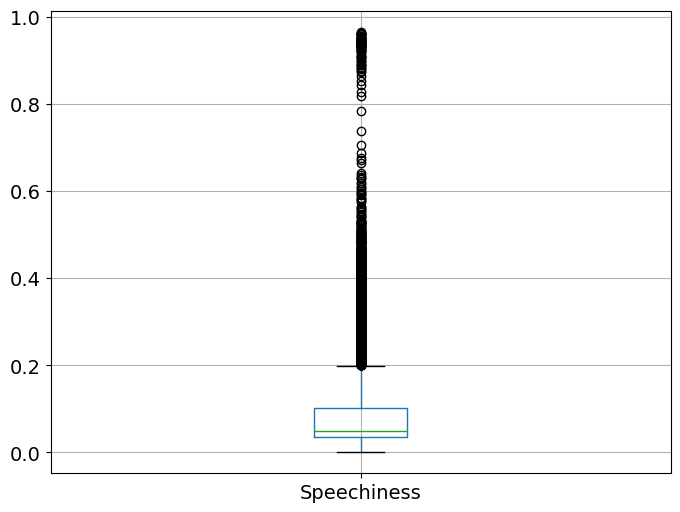

In [81]:
# No improvement. Still using songs3
songs3.boxplot(column='Speechiness');

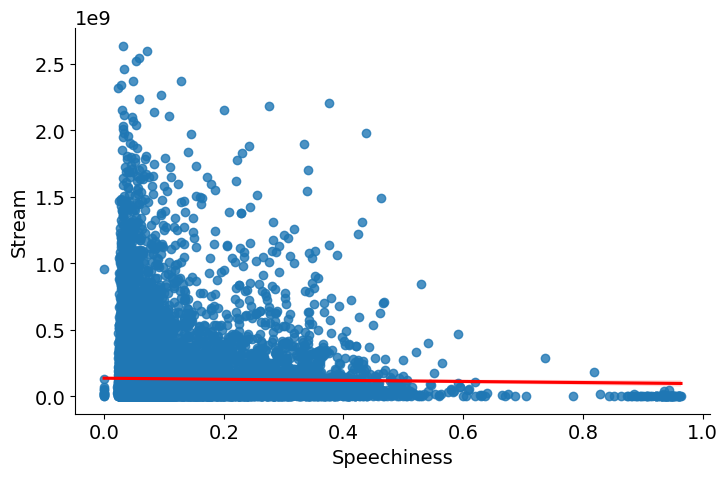

In [82]:
sns.lmplot(data=songs3, x='Speechiness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

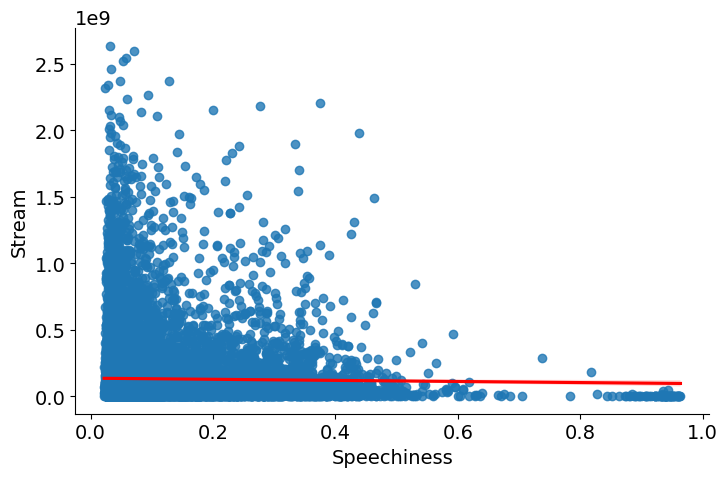

In [83]:
songs4 = songs3[songs3.Speechiness > 0.0]
sns.lmplot(data=songs4, x='Speechiness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [84]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 232369633
The best RMSE is still 224733049


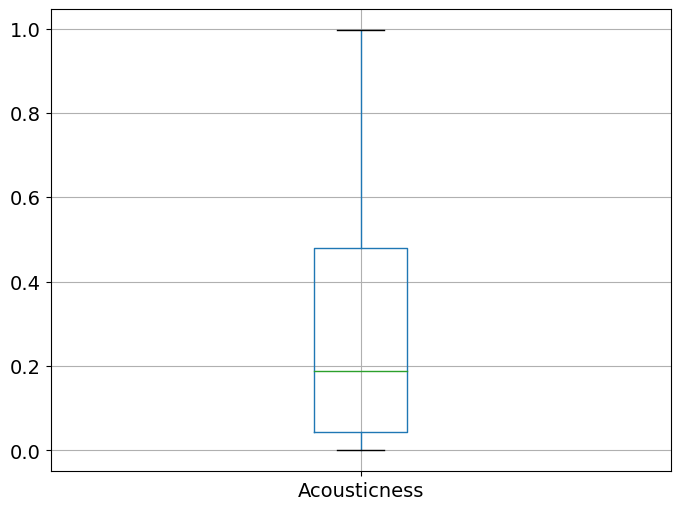

In [85]:
# No improvement. Still using songs3
songs3.boxplot(column='Acousticness');

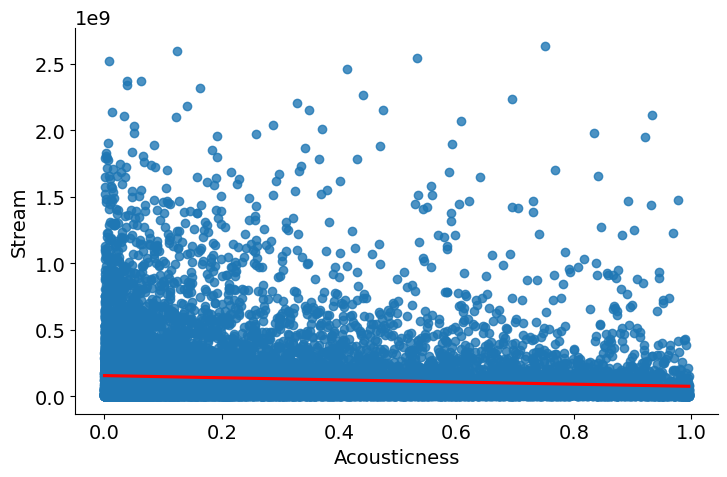

In [86]:
sns.lmplot(data=songs3, x='Acousticness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

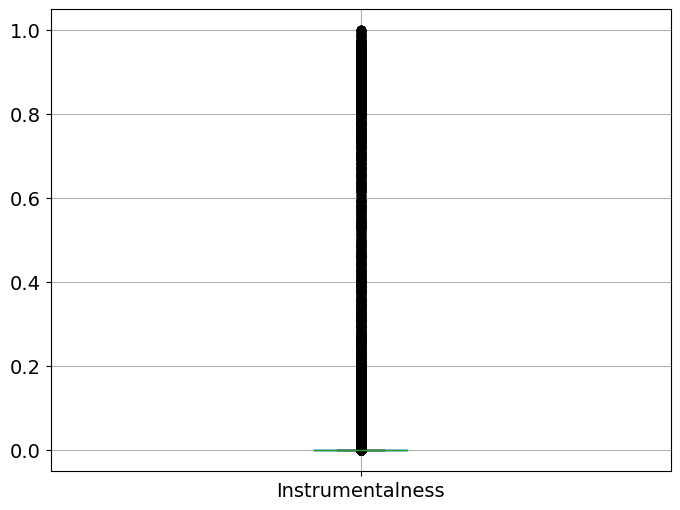

In [87]:
songs3.boxplot(column='Instrumentalness');

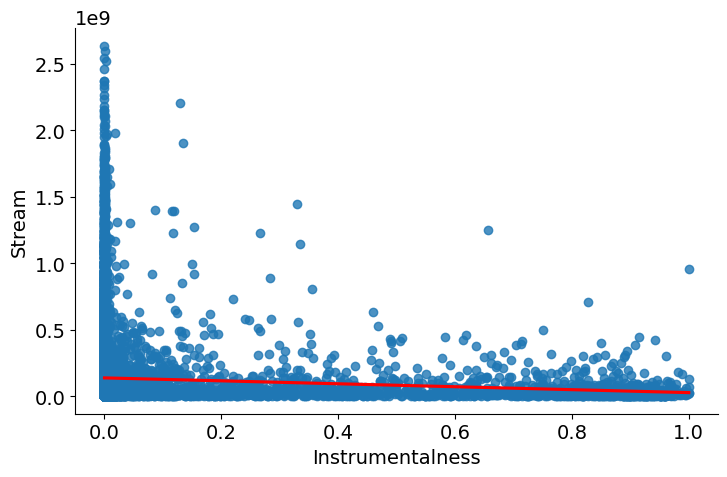

In [88]:
sns.lmplot(data=songs3, x='Instrumentalness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

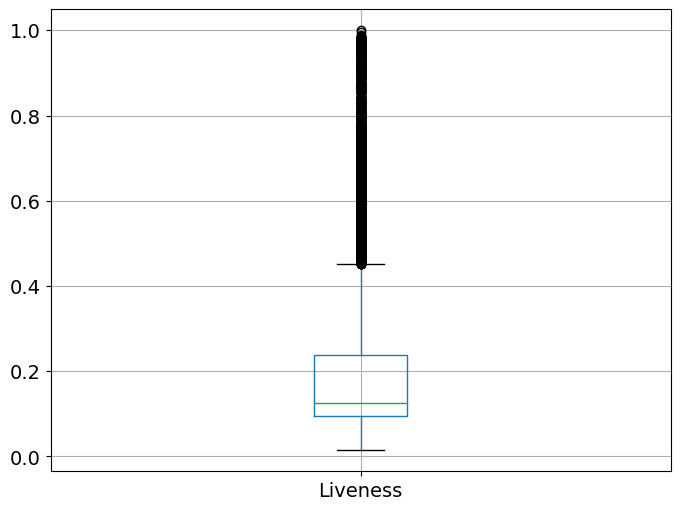

In [89]:
songs3.boxplot(column='Liveness');

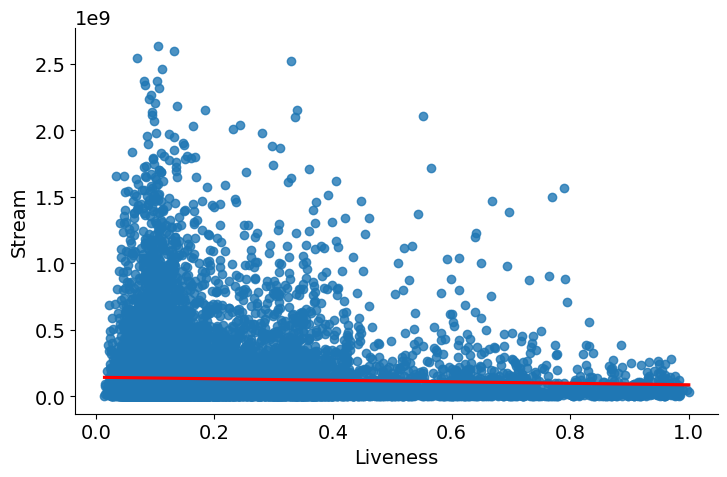

In [90]:
sns.lmplot(data=songs3, x='Liveness', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

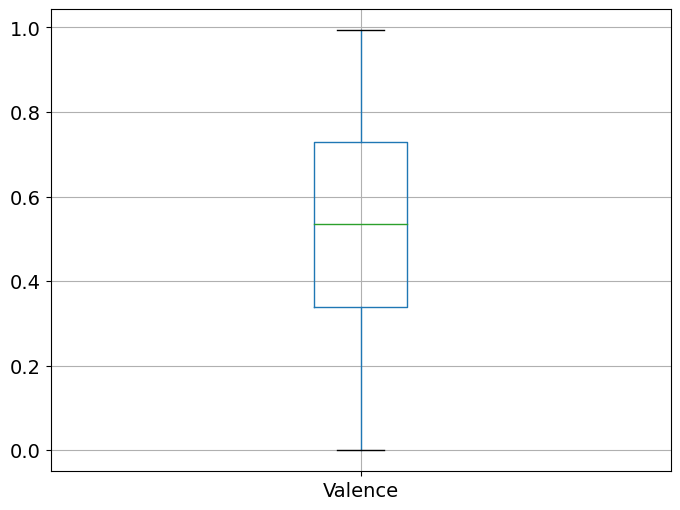

In [91]:
songs3.boxplot(column='Valence');

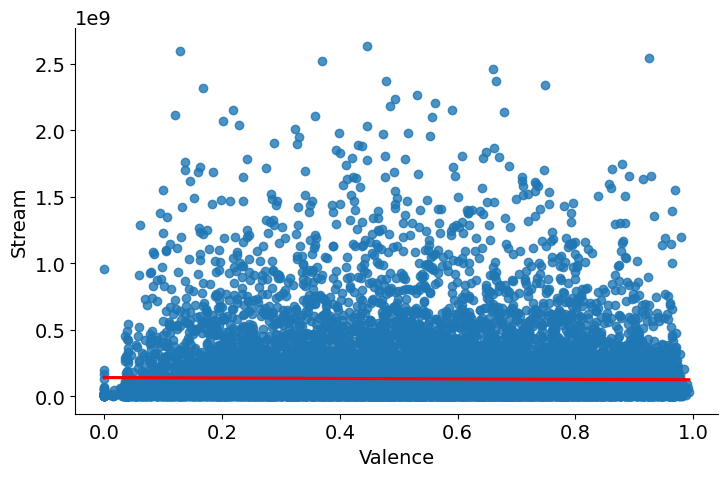

In [92]:
sns.lmplot(data=songs3, x='Valence', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

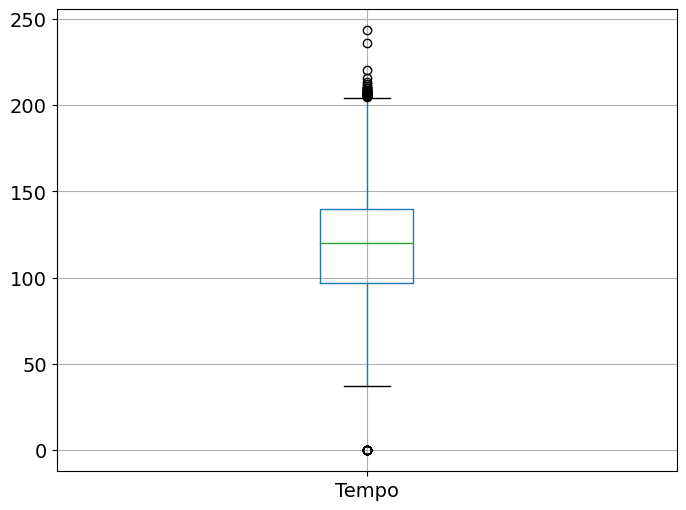

In [93]:
songs3.boxplot(column='Tempo');

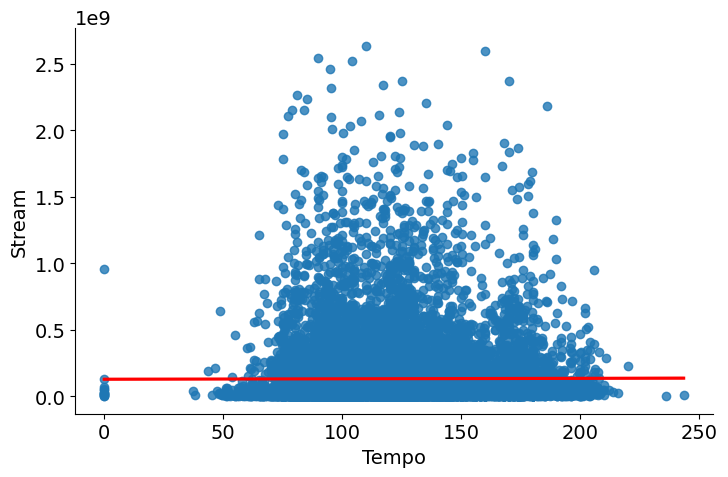

In [94]:
sns.lmplot(data=songs3, x='Tempo', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

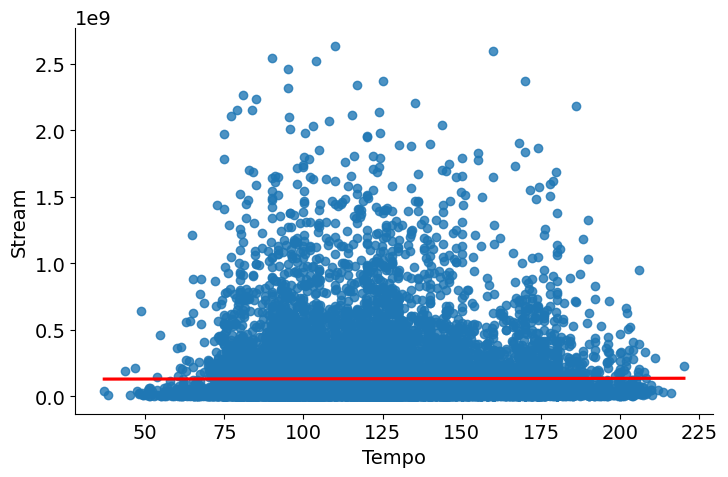

In [96]:
songs4 = songs3[(songs3.Tempo > 0) & (songs3.Tempo < 230)]
sns.lmplot(data=songs4, x='Tempo', y='Stream', aspect=1.5, scatter_kws={}, line_kws={'color':'red'});

In [97]:
rmse = get_rmse(songs4, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 220917748
This is now the best RMSE.


### Removed more outliers (`Tempo` was 0 or greater than 230)

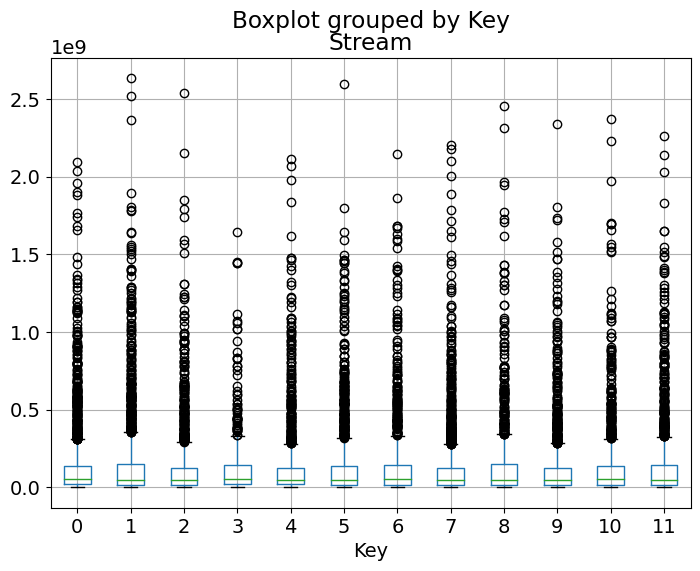

In [116]:
songs[(songs.Stream < 3.0e9) & (songs.Tempo > 0) & (songs.Tempo < 230)].boxplot(column='Stream', by='Key');

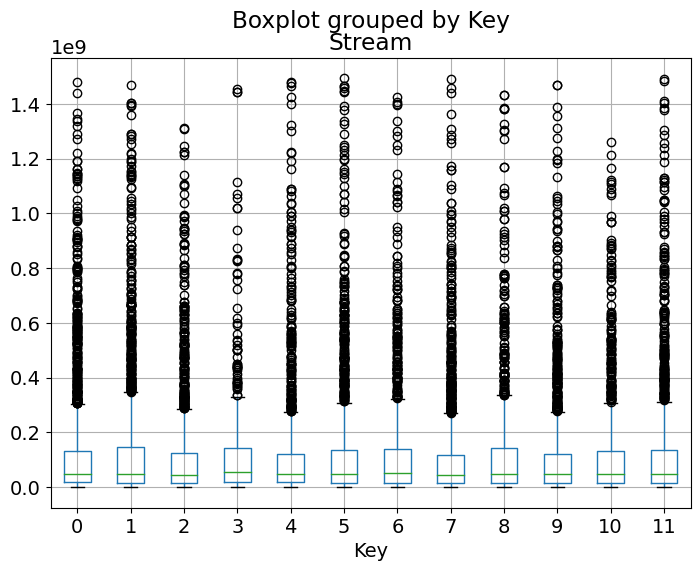

In [129]:
songs[(songs.Stream <= 1.5e9) & (songs.Tempo > 0) & (songs.Tempo < 230)].boxplot(column='Stream', by='Key');

In [130]:
songs5 = songs4[songs4.Stream <= 1.5e9]

In [131]:
rmse = get_rmse(songs5, feature_columns_2, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 197570949
This is now the best RMSE.


In [132]:
songs.shape[0] - songs5.shape[0], round(100 * (songs.shape[0] - songs5.shape[0]) / songs.shape[0], 2)

(109, 0.6)

### Restricting the dataset to streams under 1.5 billion improved the RMSE.
### (In all, I removed 109 songs, but this is only 0.6% of the original dataset.)

### In some of the above scatterplots, the songs with high numbers of streams were concentrated at one end of the x domain. I will create a model with only these columns.

In [133]:
feature_columns_3 = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Duration_ms']

In [134]:
rmse = get_rmse(songs5, feature_columns_3, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 197906012
The best RMSE is still 197570949


In [135]:
# Being even more selective with the concentration of points
feature_columns_4 = ['Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']

In [136]:
rmse = get_rmse(songs5, feature_columns_4, lin_reg)
best_rmse = new_best_rmse(rmse, best_rmse)

RMSE for this model = 198478733
The best RMSE is still 197570949


### The best model seems to include all the columns.
### Now let's try each column individually.

In [135]:
print(feature_columns_2)

['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11']


In [141]:
for col in feature_columns_2:
    col_rmse = get_rmse(songs5, [col], lin_reg)
    print(f'RMSE for {col}: {round(col_rmse)} {col_rmse < best_rmse}')

RMSE for Danceability: 199572060 False
RMSE for Energy: 199904930 False
RMSE for Loudness: 198755045 False
RMSE for Speechiness: 200099820 False
RMSE for Acousticness: 199330718 False
RMSE for Instrumentalness: 199173464 False
RMSE for Liveness: 199858372 False
RMSE for Valence: 199934713 False
RMSE for Tempo: 199981493 False
RMSE for Duration_ms: 200206967 False
RMSE for Key_1: 199925095 False
RMSE for Key_2: 199901139 False
RMSE for Key_3: 199985155 False
RMSE for Key_4: 199987308 False
RMSE for Key_5: 199975940 False
RMSE for Key_6: 199990087 False
RMSE for Key_7: 199979044 False
RMSE for Key_8: 200056778 False
RMSE for Key_9: 199967413 False
RMSE for Key_10: 199981170 False
RMSE for Key_11: 199935355 False


### No column by itself is as good at predicting streams as all of them together.

In [142]:
100 * (baseline_rmse - best_rmse) / baseline_rmse

15.076777867445008

### The best model is 15.07% better than always guessing the average number of streams.

### So what exactly is the best regression formula?

In [158]:
X = songs5[feature_columns_2]
y = songs5.Stream
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lin_reg.fit(X_train, y_train)
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

In [175]:
model = str(intercept)

for i in range(len(feature_columns_2)):
    model += f'\n + {coefficients[i]} * {feature_columns_2[i]}'

print(model)

258144753.6727259
 + 46678394.61158678 * Danceability
 + -91527675.0105574 * Energy
 + 5140060.138893151 * Loudness
 + -86702601.95036538 * Speechiness
 + -77627620.90985188 * Acousticness
 + -43720964.9858975 * Instrumentalness
 + -36207393.79748348 * Liveness
 + -48573062.87163128 * Valence
 + -26000.31963222797 * Tempo
 + 29.393235176449462 * Duration_ms
 + 1806597.748902627 * Key_1
 + -10359526.72725458 * Key_2
 + 2625383.5746598477 * Key_3
 + -3298021.5950675956 * Key_4
 + 7309562.262874163 * Key_5
 + -476349.4633205064 * Key_6
 + -14685578.325754615 * Key_7
 + 5825260.750930999 * Key_8
 + -14443330.585829597 * Key_9
 + -8621321.681689 * Key_10
 + -534147.0725572755 * Key_11
